In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

In [2]:
df = pd.read_csv('train_data.csv', index_col='Unnamed: 0')
dft = pd.read_csv('test_data.csv', index_col='Unnamed: 0')
df.head()

,loja,data,venda,loja_web,index,c_br,c_uy,s_al,s_am,s_ap,s_ba,s_ce,s_df,s_es,s_ex,s_go,s_ma,s_mg,s_ms,s_mt,s_pa,s_pb,s_pe,s_pi,s_pr,s_rj,s_rn,s_ro,s_rr,s_rs,s_sc,s_se,s_sp,s_to,week_of_year,year,store_avg,store_std,holiday
0,renner_ar_ex_1,2019-12-08,68,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,2019,46.319672,68.294485,0
1,renner_ar_ex_1,2019-12-15,376,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,2019,46.319672,68.294485,0
2,renner_ar_ex_1,2019-12-22,345,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,2019,46.319672,68.294485,1
3,renner_ar_ex_1,2019-12-29,219,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,2019,46.319672,68.294485,1
4,renner_ar_ex_1,2020-01-05,140,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2020,46.319672,68.294485,1


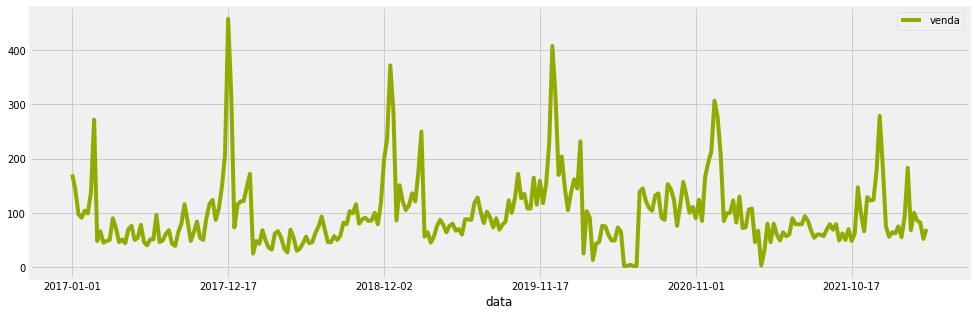

In [3]:
df[df.loja=='renner_br_rj_85'].plot('data', 'venda', figsize=(15,5), color=color_pal[2])
plt.show()

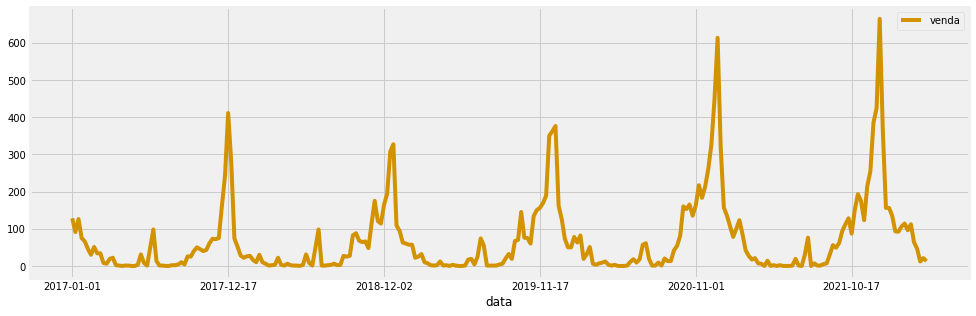

In [4]:
df[df.loja=='renner_br_rs_52'].plot('data', 'venda', figsize=(15,5), color=color_pal[1])
plt.show()

In [5]:
split_date = '2021-09-01'
df_train = df.loc[(df.data<split_date)&(df.loja=='renner_br_rs_52')]
df_test = df.loc[(df.data>=split_date)&(df.loja=='renner_br_rs_52')]

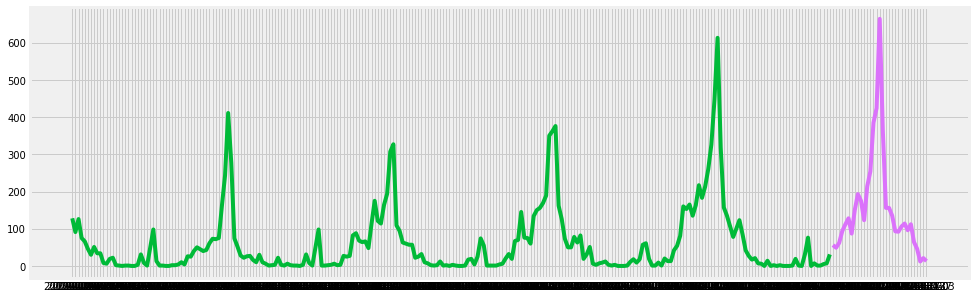

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df_train['data'], df_train['venda'], color=color_pal[3])
plt.plot(df_test['data'], df_test['venda'], color=color_pal[7])
plt.show()

In [7]:
import xgboost as xgb 
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
df_train.columns

Index(['loja', 'data', 'venda', 'loja_web', 'index', 'c_br', 'c_uy', 's_al',
       's_am', 's_ap', 's_ba', 's_ce', 's_df', 's_es', 's_ex', 's_go', 's_ma',
       's_mg', 's_ms', 's_mt', 's_pa', 's_pb', 's_pe', 's_pi', 's_pr', 's_rj',
       's_rn', 's_ro', 's_rr', 's_rs', 's_sc', 's_se', 's_sp', 's_to',
       'week_of_year', 'year', 'store_avg', 'store_std', 'holiday'],
      dtype='object')

In [9]:
df_train.iloc[:, 3:]

,loja_web,index,c_br,c_uy,s_al,s_am,s_ap,s_ba,s_ce,s_df,s_es,s_ex,s_go,s_ma,s_mg,s_ms,s_mt,s_pa,s_pb,s_pe,s_pi,s_pr,s_rj,s_rn,s_ro,s_rr,s_rs,s_sc,s_se,s_sp,s_to,week_of_year,year,store_avg,store_std,holiday
58539,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,52,2017,68.570909,100.347632,1
58540,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2017,68.570909,100.347632,1
58541,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2017,68.570909,100.347632,0
58542,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,2017,68.570909,100.347632,0
58543,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,2017,68.570909,100.347632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58778,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,30,2021,68.570909,100.347632,0
58779,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,31,2021,68.570909,100.347632,0
58780,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,32,2021,68.570909,100.347632,0
58781,0,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,33,2021,68.570909,100.347632,0


In [10]:
X_train = df_train.iloc[:, 3:]
X_test = df_test.iloc[:, 3:]
y_train = df_train['venda']
y_test = df_test['venda']

In [11]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [12]:
predictions = reg.predict(X_test)
predictions

array([ 26.493502 ,  23.333136 ,  50.37252  ,  63.814713 ,  89.51071  ,
       166.99596  , 162.06955  , 170.90218  , 143.64473  , 166.72784  ,
       220.11778  , 187.59587  , 216.83922  , 262.08725  , 326.4177   ,
       447.15137  , 612.6901   , 317.99942  , 134.98813  , 105.9363   ,
        78.00743  , 100.007576 , 122.87073  ,  84.42421  ,  42.86929  ,
        26.385023 ,  17.100348 ,  21.99751  ,   6.948558 ,   4.7851686,
         1.583814 ], dtype=float32)

In [14]:
df_test.loc[:, 'prediction'] = predictions

/var/folders/2y/jh1g0c4s25j_8smq9tb5gtpc0000gn/T/ipykernel_9619/3467947641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:, 'prediction'] = predictions


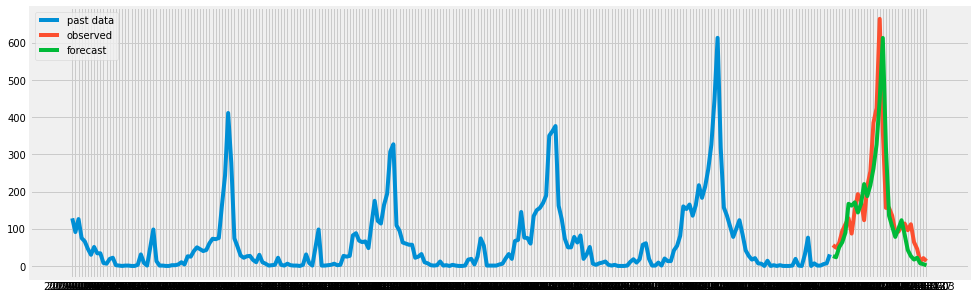

In [22]:
plt.figure(figsize=(15,5))
plt.plot(df_train['data'], df_train['venda'], label='past data')
plt.plot(df_test['data'], df_test['venda'], label='observed')
plt.plot(df_test['data'], df_test['prediction'], color=color_pal[3], label='forecast')
plt.legend()
plt.show()

In [23]:
mean_squared_error(y_true=df_test['venda'],y_pred=df_test['prediction'])

6468.205624880257

In [25]:
np.sqrt(mean_squared_error(y_true=df_test['venda'],y_pred=df_test['prediction']))

80.42515542341374

In [24]:
mean_absolute_error(y_true=df_test['venda'],y_pred=df_test['prediction'])

54.278676575230016

In [28]:
X_train = df.iloc[:, 3:]
X_test = dft.iloc[:, 3:]
y_train = df['venda']
y_test = dft['venda']

In [29]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [30]:
predictions = reg.predict(X_test)

In [31]:
dft.loc[:, 'prediction'] = predictions

In [76]:
df.loja.value_counts().iloc[0:10]

renner_br_rj_85    275
renner_br_rs_52    275
renner_br_rs_40    275
renner_br_rs_38    275
renner_br_rs_37    275
renner_br_rs_34    275
renner_br_rs_32    275
renner_br_rs_30    275
renner_br_rs_3     275
renner_br_rs_29    275
Name: loja, dtype: int64

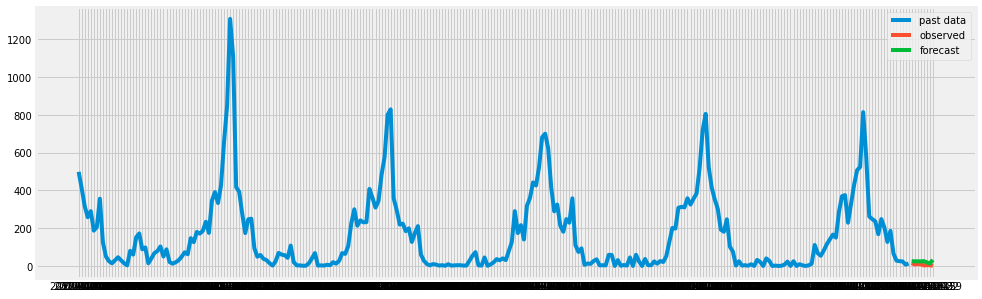

In [79]:
plt.figure(figsize=(15,5))
plt.plot(df[df.loja=='renner_br_rs_3']['data'], df[df.loja=='renner_br_rs_3']['venda'], label='past data')
plt.plot(dft[dft.loja=='renner_br_rs_3']['data'], dft[dft.loja=='renner_br_rs_3']['venda'], label='observed')
plt.plot(dft[dft.loja=='renner_br_rs_3']['data'], dft[dft.loja=='renner_br_rs_3']['prediction'], color=color_pal[3], label='forecast')
plt.legend()
plt.show()

In [41]:
mean_squared_error(y_true=dft['venda'],y_pred=dft['prediction'])

5476.048040172828

In [42]:
np.sqrt(mean_squared_error(y_true=dft['venda'],y_pred=dft['prediction']))

74.00032459505044

In [43]:
mean_absolute_error(y_true=dft['venda'],y_pred=dft['prediction'])

45.333487359244124

In [57]:
dft['error'] = dft['venda'] - dft['prediction']
dft['abs_error'] = dft['error'].apply(np.abs)
error_by_week = dft.groupby(['week_of_year']).mean()[['venda','prediction','error','abs_error']]
error_by_week.sort_values('error', ascending=True).head(10)

,venda,prediction,error,abs_error
week_of_year,,,,
21,69.373938,139.975113,-70.601178,70.754437
19,56.718663,121.326202,-64.607538,64.662983
20,64.793201,119.172134,-54.378930,59.054725
18,82.848066,127.351738,-44.503672,45.064356
17,97.766756,132.508865,-34.742113,39.919277
16,83.592493,118.139442,-34.546951,36.112694
15,90.298429,115.945839,-25.647412,31.146950
14,101.228426,110.611023,-9.382598,20.508761


In [59]:
error_by_week.sort_values('error', ascending=False).head(10)

,venda,prediction,error,abs_error
week_of_year,,,,
14,101.228426,110.611023,-9.382598,20.508761
15,90.298429,115.945839,-25.647412,31.146950
16,83.592493,118.139442,-34.546951,36.112694
17,97.766756,132.508865,-34.742113,39.919277
18,82.848066,127.351738,-44.503672,45.064356
20,64.793201,119.172134,-54.378930,59.054725
19,56.718663,121.326202,-64.607538,64.662983
21,69.373938,139.975113,-70.601178,70.754437


In [61]:
error_by_week.sort_values('abs_error', ascending=False).head(10)

,venda,prediction,error,abs_error
week_of_year,,,,
21,69.373938,139.975113,-70.601178,70.754437
19,56.718663,121.326202,-64.607538,64.662983
20,64.793201,119.172134,-54.378930,59.054725
18,82.848066,127.351738,-44.503672,45.064356
17,97.766756,132.508865,-34.742113,39.919277
16,83.592493,118.139442,-34.546951,36.112694
15,90.298429,115.945839,-25.647412,31.146950
14,101.228426,110.611023,-9.382598,20.508761


In [62]:
error_by_week.sort_values('abs_error', ascending=True).head(10)

,venda,prediction,error,abs_error
week_of_year,,,,
14,101.228426,110.611023,-9.382598,20.508761
15,90.298429,115.945839,-25.647412,31.146950
16,83.592493,118.139442,-34.546951,36.112694
17,97.766756,132.508865,-34.742113,39.919277
18,82.848066,127.351738,-44.503672,45.064356
20,64.793201,119.172134,-54.378930,59.054725
19,56.718663,121.326202,-64.607538,64.662983
21,69.373938,139.975113,-70.601178,70.754437


In [71]:
dft.loc[dft.week_of_year>=18][['loja_web', 'holiday', 'c_br']].value_counts()

loja_web  holiday  c_br
0         0        1       1400
                   0         19
1         0        1          8
dtype: int64

**obs**: A gigantesca maioria dos erros acontecem em lojas brasileiras físicas fora de feriado. 